Refrensi:

https://www.kaggle.com/datasets/yasserhessein/gender-dataset

https://www.kaggle.com/code/yasserhessein/gender-classification-using-vgg16-cnn

https://www.kaggle.com/code/abdelaziznabil/the-detection-of-eyes-and-classification

https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/

https://machinelearningmastery.com/category/deep-learning-for-computer-vision/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Installing Visual Keras

!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.9 MB/s eta 0:00:00


# Import Library Needed

In [3]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from PIL import Image
from google.colab.patches import cv2_imshow
import shutil


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam

# Visualizing our model (Hidden Input)
import visualkeras

%matplotlib inline

# Set-up Env Variable for kaggle Config

In [4]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/'

# Download and Unzip the dataset
Dengan cara ***Pilih Dataset*** di ***Kaggle***, lalu klik ***Titik Tiga***, dan pilih ***Copy API Command***

In [5]:
# # Tentukan path untuk menyimpan dataset
# path_to_save = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/Dataset/'

In [6]:
# # Buat direktori jika belum ada
# os.makedirs(path_to_save, exist_ok=True)

In [7]:
# # Unduh dataset menggunakan perintah kaggle
# !kaggle datasets download -d yasserhessein/gender-dataset -p '{path_to_save}'

In [8]:
# # Ekstrak dataset
# !unzip '{path_to_save}/gender-dataset.zip' -d '{path_to_save}'

In [9]:
# # Hapus file zip jika diperlukan
# os.remove(f'{path_to_save}/gender-dataset.zip')

# Gender Classification Using VGG16+CNN

## Load file

In [10]:
# Path ke folder data utama
base_dir  = "/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/Dataset"

# Path ke folder untuk Popilasi data latih dan data uji
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

# Daftar kelas (Stunting dan Tidak Stunting)
classes = ["Male", "Female"]

#Direktori data Populasi training
train_female_dir = os.path.join(train_dir, classes[1])
train_male_dir = os.path.join(train_dir, classes[0])

#Direktori data Populasi Validation
test_female_dir = os.path.join(test_dir, classes[1])
test_male_dir = os.path.join(test_dir, classes[0])

In [11]:
# # Fungsi untuk mengambil 250 data per kelas
# def copy_data(source_dir, dest_dir, num_samples=250):
#     if not os.path.exists(dest_dir):
#         os.makedirs(dest_dir)
#     count = 0
#     for file in os.listdir(source_dir):
#         if count >= num_samples:
#             break
#         src_file = os.path.join(source_dir, file)
#         dst_file = os.path.join(dest_dir, file)
#         shutil.copyfile(src_file, dst_file)
#         count += 1

# # Ambil 100 data per kelas dari data training
# for class_name in classes:
#     src_dir = os.path.join(train_dir, class_name)
#     dest_dir = os.path.join(base_dir, 'Train_Sample', class_name)
#     copy_data(src_dir, dest_dir)

# # Ambil 100 data per kelas dari data uji
# for class_name in classes:
#     src_dir = os.path.join(test_dir, class_name)
#     dest_dir = os.path.join(base_dir, 'Test_Sample', class_name)
#     copy_data(src_dir, dest_dir)

# print("Data sampling selesai.")

In [12]:
# Path ke folder data utama
base_dir  = "/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/Dataset"

# Path ke folder untuk sample data latih dan data uji
sample_train_dir = os.path.join(base_dir, 'Train_Sample')
sample_test_dir = os.path.join(base_dir, 'Test_Sample')

# Daftar kelas (Stunting dan Tidak Stunting)
classes = ["Male", "Female"]

#Direktori sample data training
sample_train_female_dir = os.path.join(sample_train_dir, classes[1])
sample_train_male_dir = os.path.join(sample_test_dir, classes[0])

#Direktori sample data Validation
sample_test_female_dir = os.path.join(sample_train_dir, classes[1])
sample_test_male_dir = os.path.join(sample_test_dir, classes[0])

In [13]:
import os

def count_files_in_folder(folder_path):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    return len(files)

# Membuat path lengkap untuk setiap folder
file_counts = {}

for class_name in classes:
    train_class_folder = os.path.join(sample_train_dir, class_name)
    test_class_folder = os.path.join(sample_test_dir, class_name)

    # Menambahkan jumlah file dalam setiap folder ke dalam kamus
    file_counts[class_name] = {
        "train": count_files_in_folder(train_class_folder),
        "test": count_files_in_folder(test_class_folder),
    }

# Menampilkan kamus yang berisi informasi jumlah file
# Konversi kamus ke dalam DataFrame
df_file_counts = pd.DataFrame(file_counts)

# Menambahkan kolom baru 'total_jumlah' dengan jumlah total per baris
df_file_counts['total_jumlah'] = df_file_counts.sum(axis=1)

In [14]:
df_file_counts

Male  Female  total_jumlah
train   250     250           500
test    250     250           500

In [15]:
# path joining version for other paths - Banyaknya data yang dimiliki
print ("Training data", sum(len(files) for _, _, files in os.walk(train_dir))) # "Directory" ada di atas
print ("Testing data", sum(len(files) for _, _, files in os.walk(test_dir))) # "Directory" ada di atas

Training data 689
Testing data 20001


## Check Image Size for Each Class

In [16]:
def check_image_size(folder_dir):
    size_images = dict()

    for dirpath, _, filenames in os.walk(folder_dir):
        for path_image in filenames:
            image = os.path.abspath(os.path.join(dirpath, path_image))
            with Image.open(image) as img:
                width, height = img.size
                size_images[path_image] = {'width': width, 'height': height}

    return size_images

In [17]:
# Contoh penggunaan untuk folder_train_TidakStunting_dir
size_images_train_female = check_image_size(sample_train_female_dir)
print("Ukuran Gambar pada [Female]:")
print(size_images_train_female)

# Contoh penggunaan untuk folder_train_Stunting_dir
size_images_train_male = check_image_size(sample_train_male_dir)
print("\nUkuran Gambar pada [Male]:")
print(size_images_train_male)

Ukuran Gambar pada [Female]:
{'023121.jpg': {'width': 178, 'height': 218}, '023123.jpg': {'width': 178, 'height': 218}, '023126.jpg': {'width': 178, 'height': 218}, '023124.jpg': {'width': 178, 'height': 218}, '023129.jpg': {'width': 178, 'height': 218}, '023133.jpg': {'width': 178, 'height': 218}, '023134.jpg': {'width': 178, 'height': 218}, '023135.jpg': {'width': 178, 'height': 218}, '023136.jpg': {'width': 178, 'height': 218}, '023141.jpg': {'width': 178, 'height': 218}, '023138.jpg': {'width': 178, 'height': 218}, '023145.jpg': {'width': 178, 'height': 218}, '023146.jpg': {'width': 178, 'height': 218}, '023144.jpg': {'width': 178, 'height': 218}, '023151.jpg': {'width': 178, 'height': 218}, '023150.jpg': {'width': 178, 'height': 218}, '023152.jpg': {'width': 178, 'height': 218}, '023156.jpg': {'width': 178, 'height': 218}, '023157.jpg': {'width': 178, 'height': 218}, '023160.jpg': {'width': 178, 'height': 218}, '023163.jpg': {'width': 178, 'height': 218}, '023165.jpg': {'width': 1

## Image Augmentation

In [18]:
batch_size = 5
target_size = (64, 64)
input_shape = (64, 64, 3)
seed = 1337
adam = 0.001
fre = -20
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
epochs = 50

validation_steps, steps_per_epoch = int(np.ceil(250  / batch_size)), int(np.ceil(250  / batch_size))

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [20]:
train_generator = train_datagen.flow_from_directory(sample_train_dir,
                                                    batch_size =batch_size ,
                                                    class_mode = 'binary',
                                                    seed=seed,
                                                    target_size = target_size )

validation_generator = test_datagen.flow_from_directory(sample_test_dir,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
display(train_generator.class_indices)
validation_generator.class_indices

{'Female': 0, 'Male': 1}

{'Female': 0, 'Male': 1}

## Akuisisi array from image

In [22]:
import numpy as np

# Simpan hasil generator training ke dalam variabel
train_data = np.array([])
train_labels = np.array([])

for _ in range(len(train_generator)):
    batch_data, batch_labels = train_generator.next()
    train_data = np.concatenate([train_data, batch_data]) if train_data.size else batch_data
    train_labels = np.concatenate([train_labels, batch_labels]) if train_labels.size else batch_labels

# # Simpan array to File
# np.save('train_data.npy', train_data)
# np.save('train_labels.npy', train_labels)

In [25]:
# Simpan hasil generator validasi ke dalam variabel
test_data = np.array([])
test_labels = np.array([])

for _ in range(len(validation_generator)):
    batch_data, batch_labels = validation_generator.next()
    test_data = np.concatenate([test_data, batch_data]) if test_data.size else batch_data
    test_labels = np.concatenate([test_labels, batch_labels]) if test_labels.size else batch_labels

# # Simpan array to File
# np.save('test_data.npy', test_data)
# np.save('test_labels.npy', test_labels)

## Base Model VGG16 and Callback Function

In [26]:
#Penggunaan Callback untuk menghentikan proses training sesuai akurasi yang diinginkan

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        val_accuracy = logs.get('val_accuracy')
        accuracy = logs.get('accuracy')
        treshold_acc = 0.9

        if val_accuracy is not None and accuracy is not None:
            if val_accuracy > treshold_acc and accuracy > treshold_acc:
                print(f"\nSudah {treshold_acc*100}% nih akurasinya jadi diberhentikan saja!")
                self.model.stop_training = True
            else:
                print(f"\nBelum mencapai akurasi >{treshold_acc*100}%, lanjutkan training.")
        else:
            print("\nNilai akurasi tidak tersedia. Lanjutkan training.")


callbacks = myCallback()

In [27]:
base_model = tf.keras.applications.VGG16(input_shape = input_shape, include_top = False, weights = "imagenet")
# Freezing Layers

for layer in base_model.layers[:fre]:
    layer.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# from tensorflow.keras import layers, models

# flatten_layer = layers.Flatten()
# dense_layer_1 = layers.Dense(50, activation='relu')
# dense_layer_2 = layers.Dense(20, activation='relu')
# prediction_layer = layers.Dense(5, activation='softmax')


# model = models.Sequential([
#     base_model,
#     flatten_layer,
#     dense_layer_1,
#     dense_layer_2,
#     prediction_layer
# ])

In [28]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # Mengubah output menjadi vektor satu dimensi
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid') # Layer output dengan 1 unit dan fungsi aktivasi sigmoid untuk klasifikasi biner
dropout_layer = tf.keras.layers.Dropout(0.3)

transfer_model = tf.keras.Sequential([
  base_model,
  dropout_layer,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.00001
transfer_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

## Model Architecture

In [29]:
transfer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 2, 2, 512)         0         
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14715201 (56.13 MB)
Trainable params: 14715201 (56.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(transfer_model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

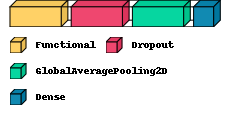

In [30]:
visualkeras.layered_view(transfer_model, scale_xy=2, legend=True)

# # Save the generated picture
# plt.savefig('CNN_Sequential_layers.png')

## Model Training (fit)

In [31]:
import time

start_time = time.time() # Hitung waktu eksekusi training

from tensorflow.keras.callbacks import EarlyStopping

# Tentukan kondisi EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_accuracy',  # Monitor akurasi pada data validasi
    patience = 10,  # Toleransi untuk tidak ada peningkatan
    restore_best_weights = True,  # Kembalikan bobot terbaik ketika berhenti
    verbose = 1
)

history = transfer_model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = [callbacks, early_stopping],
    verbose = 2
)

durasi = time.time() - start_time

print(f"--- Waktu training adalah {durasi} detik ---")
print(f"--- Waktu training adalah {durasi/60} menit ---")
print(f"--- Waktu training adalah {durasi/3600} jam ---")

Epoch 1/50

Belum mencapai akurasi >90.0%, lanjutkan training.
50/50 - 70s - loss: 0.6060 - accuracy: 0.6800 - val_loss: 0.4790 - val_accuracy: 0.7880 - 70s/epoch - 1s/step
Epoch 2/50

Belum mencapai akurasi >90.0%, lanjutkan training.
50/50 - 76s - loss: 0.4937 - accuracy: 0.7760 - val_loss: 0.4099 - val_accuracy: 0.8400 - 76s/epoch - 2s/step
Epoch 3/50

Belum mencapai akurasi >90.0%, lanjutkan training.
50/50 - 66s - loss: 0.3870 - accuracy: 0.8240 - val_loss: 0.3372 - val_accuracy: 0.8480 - 66s/epoch - 1s/step
Epoch 4/50

Belum mencapai akurasi >90.0%, lanjutkan training.
50/50 - 72s - loss: 0.4279 - accuracy: 0.8120 - val_loss: 0.2855 - val_accuracy: 0.8800 - 72s/epoch - 1s/step
Epoch 5/50

Belum mencapai akurasi >90.0%, lanjutkan training.
50/50 - 78s - loss: 0.3275 - accuracy: 0.8480 - val_loss: 0.3487 - val_accuracy: 0.8480 - 78s/epoch - 2s/step
Epoch 6/50

Belum mencapai akurasi >90.0%, lanjutkan training.
50/50 - 72s - loss: 0.3356 - accuracy: 0.8400 - val_loss: 0.3214 - val_a

In [32]:
# Simpan model setelah pelatihan selesai
transfer_model.save("/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Evaluation

In [33]:
result = transfer_model.evaluate(test_data, test_labels, batch_size = batch_size )
print("test loss, test acc:", result)

100/100 [==============================] - 26s 253ms/step - loss: 0.2611 - accuracy: 0.9080
test loss, test acc: [0.2610796093940735, 0.9079999923706055]


In [34]:
# Access accuracy history
accuracy_history = history.history['accuracy']
val_accuracy_history = history.history['val_accuracy']

# Print or use the accuracy values
print("Training Accuracy:", max(accuracy_history))
print("Validation Accuracy:", max(val_accuracy_history))

Training Accuracy: 0.9279999732971191
Validation Accuracy: 0.9120000004768372


In [35]:
from sklearn.metrics import confusion_matrix

# Membuat prediksi pada data uji
y_pred = transfer_model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Mendapatkan label sebenarnya dari data uji
y_true = test_labels

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

16/16 [==============================] - 26s 2s/step


In [36]:
from sklearn.metrics import classification_report

# Menampilkan summary report
print(classification_report(y_true, y_pred_classes, target_names=['Female', 'Male']))

              precision    recall  f1-score   support

      Female       0.91      0.90      0.91       250
        Male       0.90      0.92      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



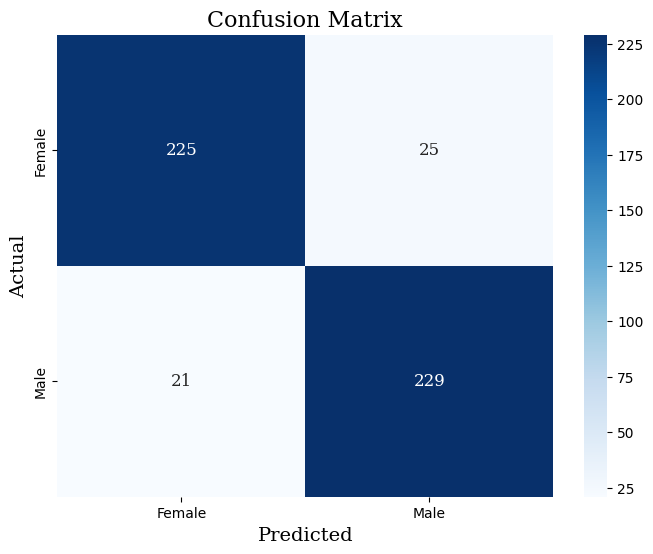

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Female', 'Male'],
            yticklabels=['Female', 'Male'],
            annot_kws={"fontsize":12, "fontfamily":"serif"})
plt.xlabel('Predicted', fontsize=14, fontfamily='serif')
plt.ylabel('Actual', fontsize=14, fontfamily='serif')
plt.title('Confusion Matrix', fontsize=16, fontfamily='serif')
plt.show()

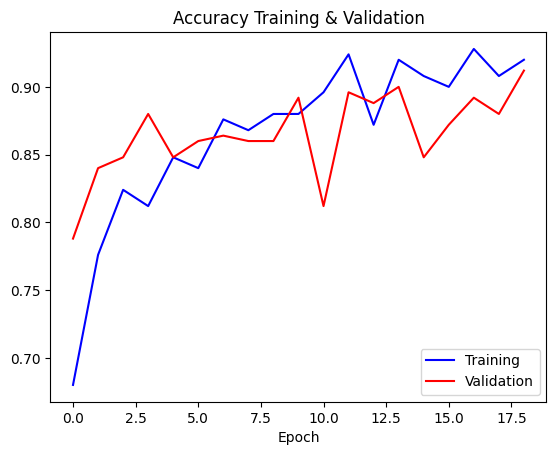

In [38]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

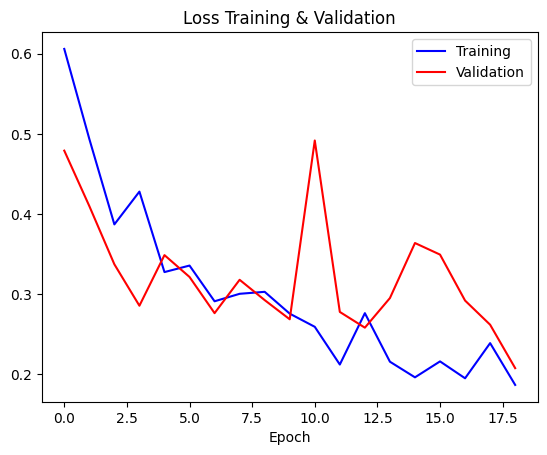

In [39]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

## Predict other data that is not in train and test

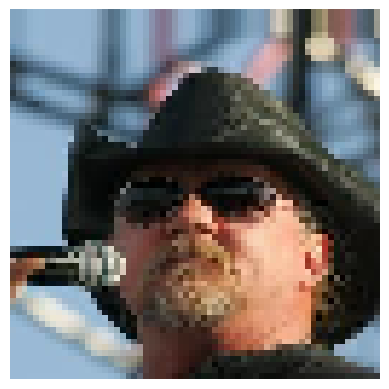

1/1 [==============================] - 0s 272ms/step
Prediction Probability: [1.]
Predicted Gender: Male


In [43]:
# Lokasi gambar untuk pengujian
path_test_model = "/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/Dataset/Data For Prediction/Male/114645.jpg"

# Muat gambar dan sesuaikan ukuran
imge = image.load_img(path_test_model, target_size=target_size)
plt.imshow(imge)
plt.axis('off')  # Matikan sumbu gambar
plt.show()

# Ubah gambar menjadi array numpy dan tambahkan dimensi batch
X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)

# Lakukan prediksi menggunakan model yang telah dilatih
predictions = transfer_model.predict(X)

# Klasifikasi hasil prediksi
if predictions[0] < 0.5:
    gender = "Female"
else:
    gender = "Male"

# Cetak hasil prediksi
print("Prediction Probability:", predictions[0])
print("Predicted Gender:", gender)


In [45]:
# Lokasi folder yang berisi gambar
folder_Data_Predict_path = "/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/Dataset/Data For Prediction"

1/1 [==============================] - 0s 125ms/step


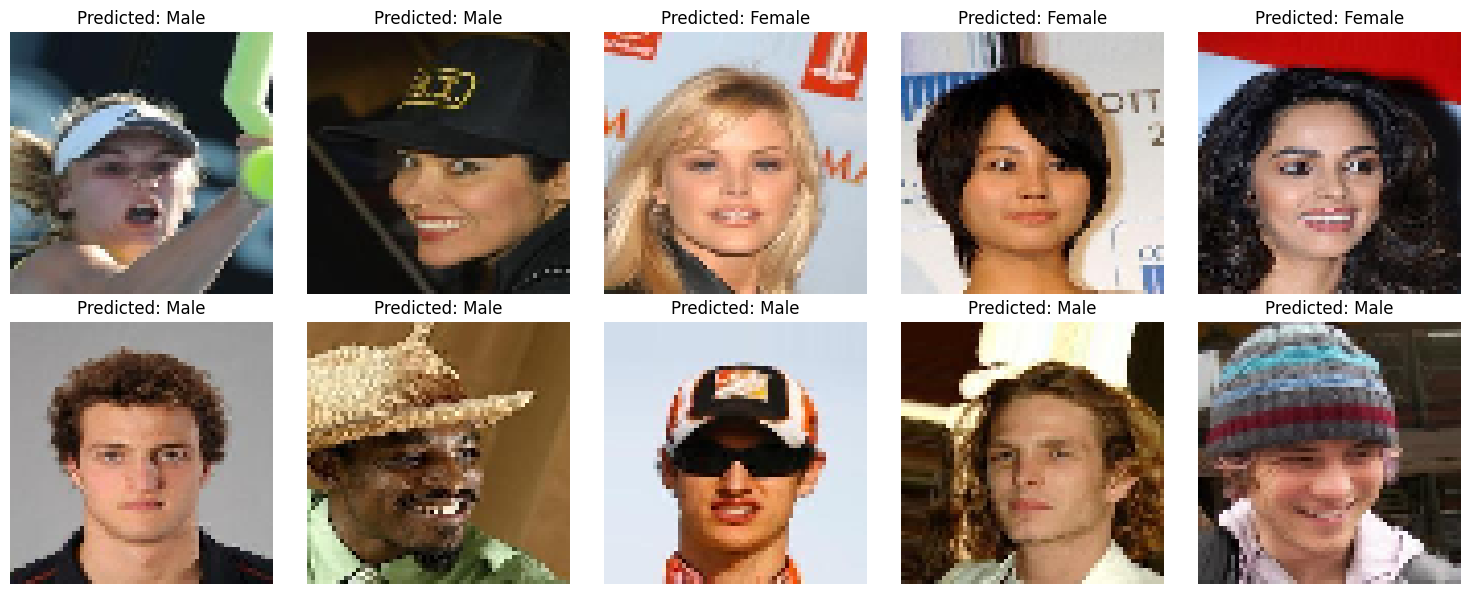

In [48]:
# Function to predict and display images
def predict_and_show_images(folder_path, target_size):
    # Get the list of class folders (Female and Male)
    class_folders = os.listdir(folder_path)

    # Calculate the number of rows and columns for subplot
    num_classes = len(class_folders)
    num_images_per_class = 5
    num_rows = num_classes
    num_columns = num_images_per_class

    # Create subplot
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 6))
    axs = axs.ravel()  # Flatten the subplot array to 1 dimension

    # Loop through each class folder
    for i, class_folder in enumerate(class_folders):
        class_folder_path = os.path.join(folder_path, class_folder)
        image_files = os.listdir(class_folder_path)

        # Loop through each image in the class folder
        for j, image_file in enumerate(image_files[:num_images_per_class]):
            # Load and resize the image
            image_path = os.path.join(class_folder_path, image_file)
            image_loaded = image.load_img(image_path, target_size=target_size)

            # Convert the image to numpy array
            X = image.img_to_array(image_loaded)
            X = np.expand_dims(X, axis=0)

            # Perform prediction using the model
            predictions = transfer_model.predict(X)

            # Classify the prediction
            if predictions[0] < 0.5:
                gender = "Female"
            else:
                gender = "Male"

            # Display the image
            axs[i*num_images_per_class + j].imshow(image_loaded)
            axs[i*num_images_per_class + j].set_title(f"Predicted: {gender}")
            axs[i*num_images_per_class + j].axis('off')  # Turn off the image axis

    plt.tight_layout()  # Adjust subplot layout
    plt.show()

# Call the function to predict and display images
predict_and_show_images(folder_Data_Predict_path, target_size)

#Template Matching Single Object Only

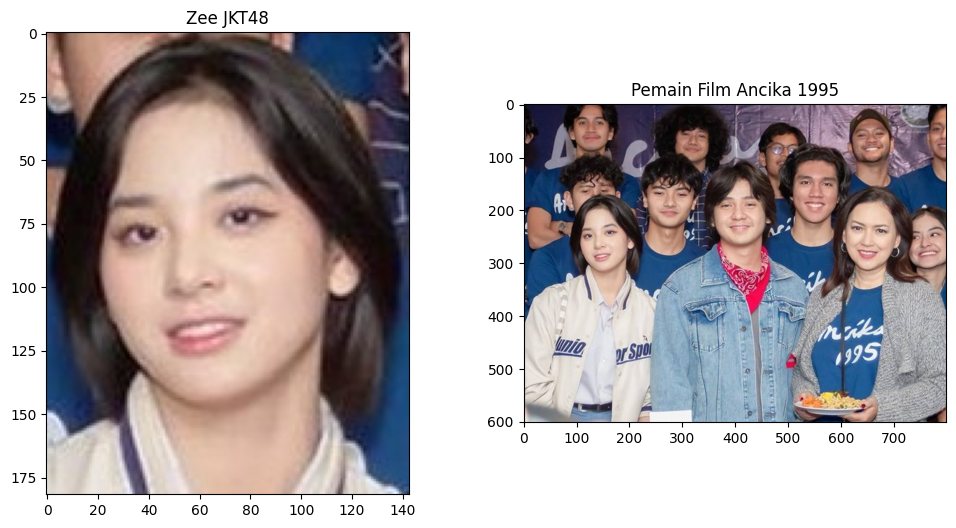

In [50]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt

# panggil dan konversi warna agar sesuai dengan Matplotlib
Zee = cv2.imread("/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/Template Matching Photos/1. Azizi Shafaa Asadel's Face.jpg")
Zee =  cv2.cvtColor(Zee, cv2.COLOR_BGR2RGB) # simpan dengan nama yang sama = ditumpuk

# panggil dan konversi warna agar sesuai dengan Matplotlib
People = cv2.imread("/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/Template Matching Photos/2. Pemain Film Ancika 1995.jpg")
People =  cv2.cvtColor(People, cv2.COLOR_BGR2RGB)

# Atur ukuran plot
plt.figure(figsize=(12, 6))

# Plot gambar pertama
plt.subplot(1, 2, 1)
plt.imshow(Zee)
plt.title('Zee JKT48')

# Plot gambar kedua
plt.subplot(1, 2, 2)
plt.imshow(People)
plt.title('Pemain Film Ancika 1995')


# Tampilkan plot
plt.show()

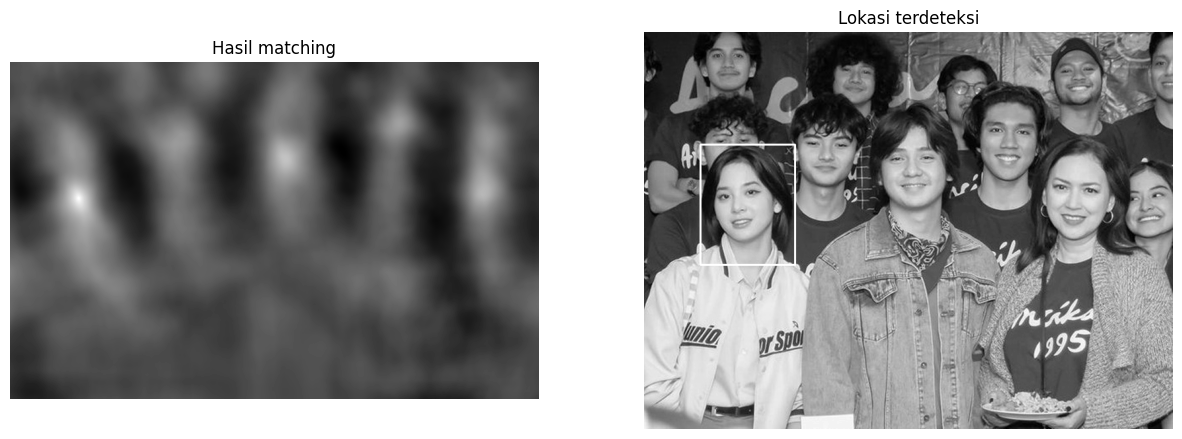

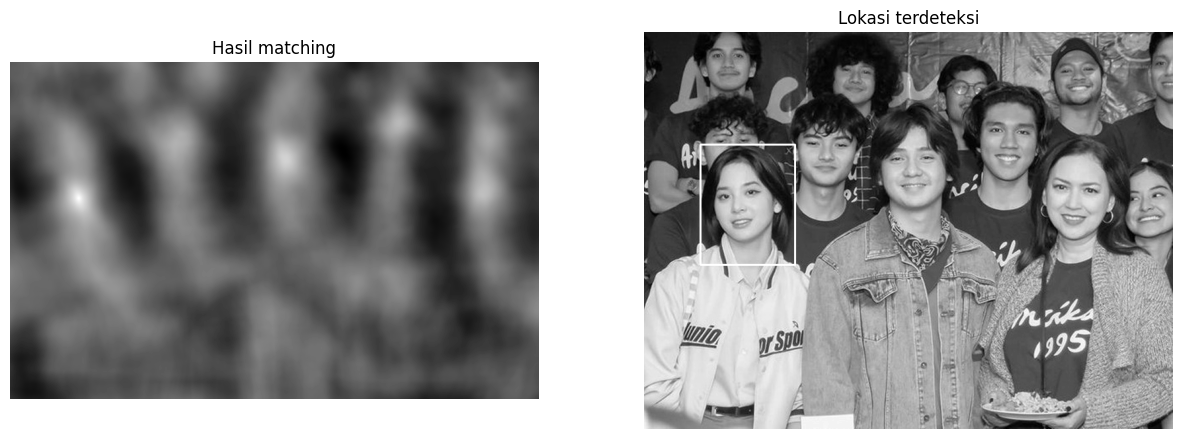

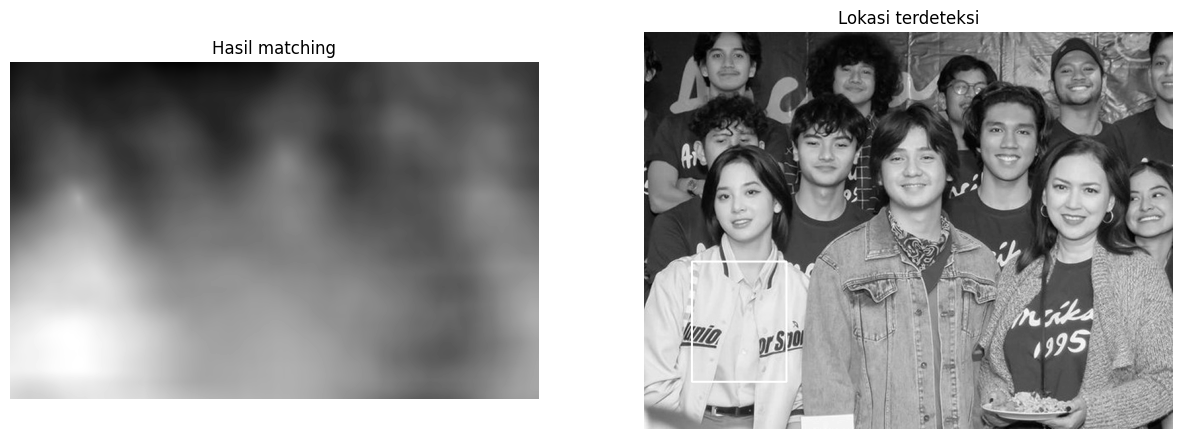

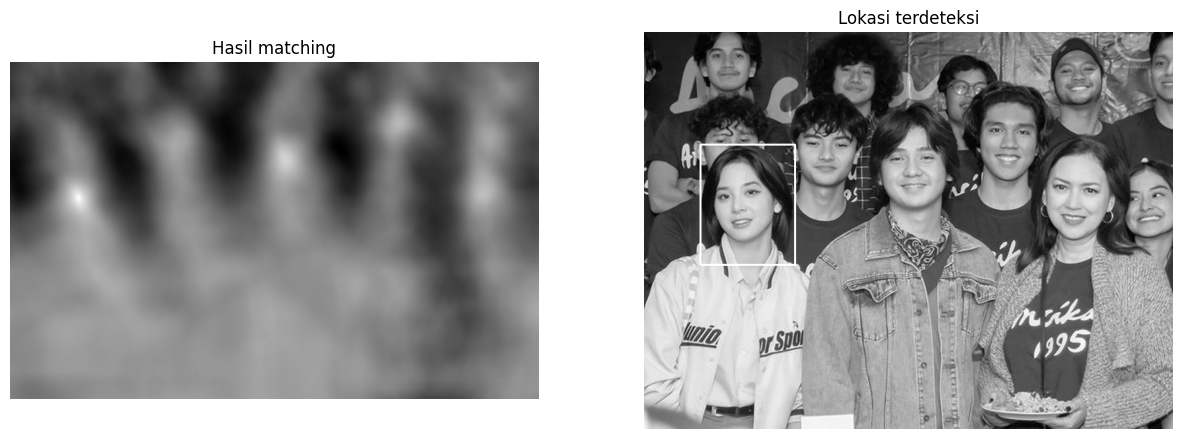

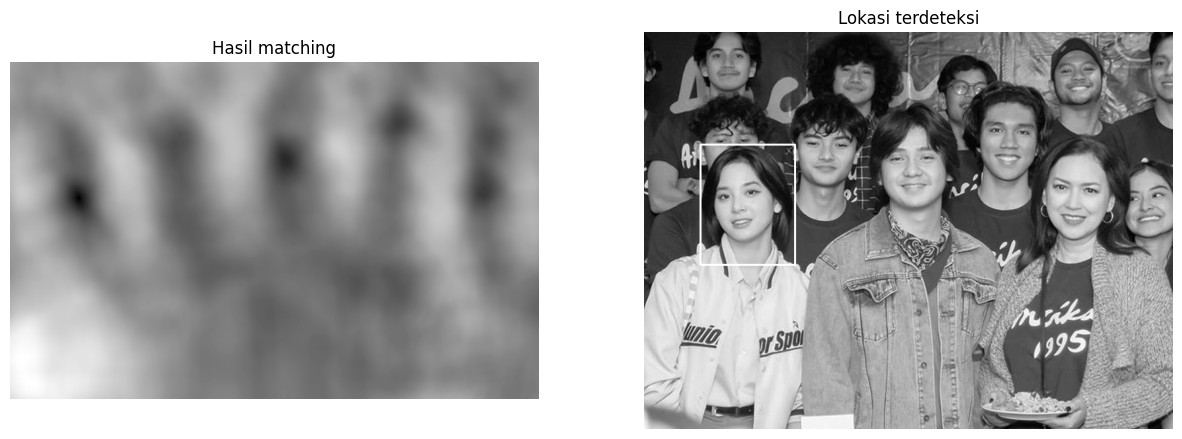

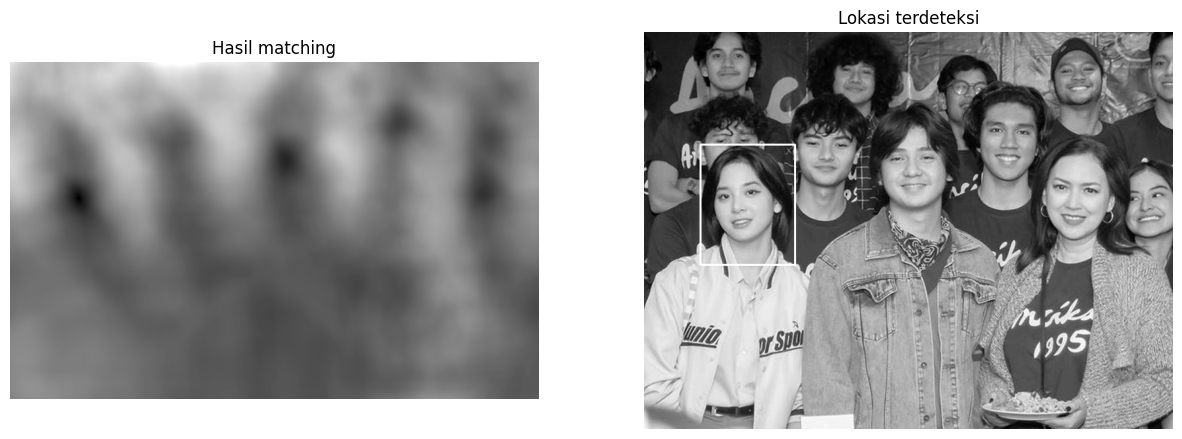

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/Template Matching Photos/2. Pemain Film Ancika 1995.jpg", 0)
img2 = img.copy()
template = cv2.imread("/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Pendahuluan Image Recognation/Template Matching Photos/1. Azizi Shafaa Asadel's Face.jpg", 0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Create an empty list to store ROIs
roi_list = []

for met in methods:
    img = img2.copy()
    method = eval(met)

    # menggunakan template matching
    res = cv2.matchTemplate(img, template, method)

    # mencari ukuran citra template untuk menggambar kotak
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # metode TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan persamaan yang sedikit berbeda
    # sehingga dibuatkan fungsi khusus untuk mengambil nilai minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # buat persegi pada lokasi yang ditemukan
    cv2.rectangle(img, top_left, bottom_right, 255, 2)  # 2 adalah ketebalan garis kotak

    # Extract ROI from the original image based on the detected location
    roi = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

    # Add ROI to the list
    roi_list.append(roi)

    # Tampilkan subplot secara horizontal
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].imshow(res, cmap='gray')
    axes[0].set_title('Hasil matching')
    axes[0].axis('off')
    axes[1].imshow(img, cmap='gray')
    axes[1].set_title('Lokasi terdeteksi')
    axes[1].axis('off')
    plt.show()

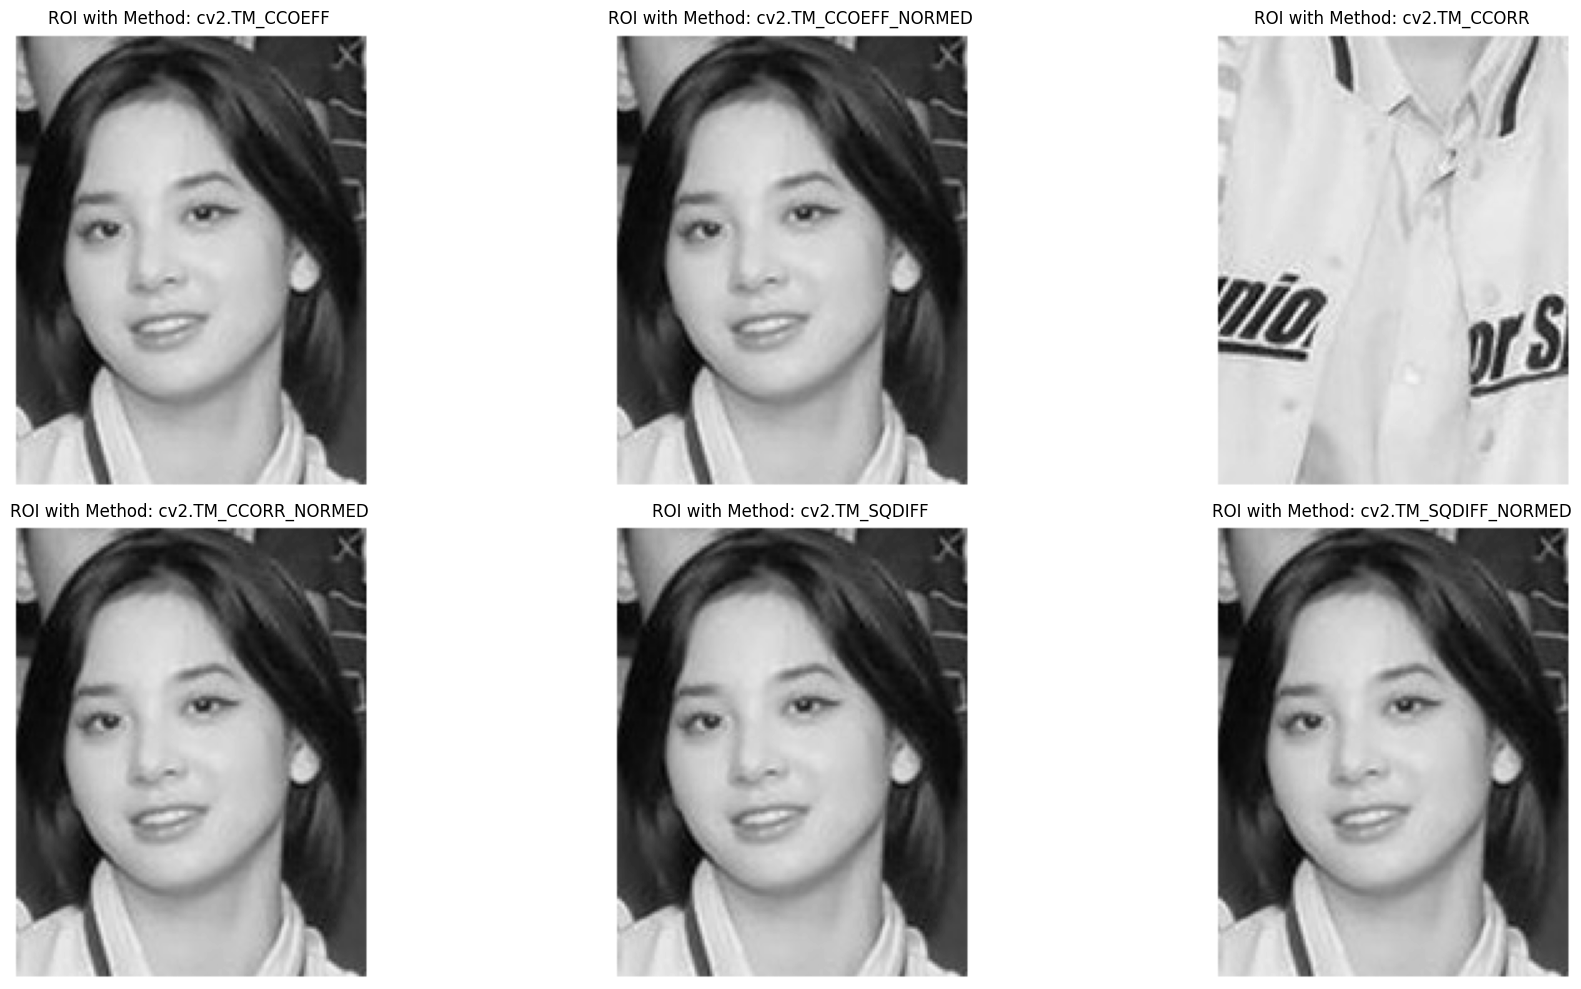

In [57]:
# Display all ROIs
plt.figure(figsize=(20, 10))
for i, roi in enumerate(roi_list):
    plt.subplot(2, 3, i + 1)
    plt.imshow(roi, cmap='gray')
    plt.title(f"ROI with Method: {methods[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 131ms/step


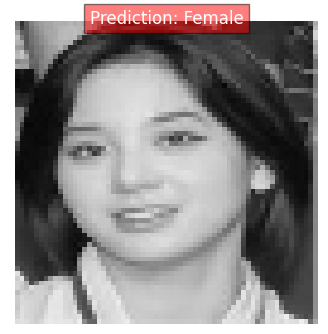

Prediction probability for ROI 1: [0.]
1/1 [==============================] - 0s 130ms/step


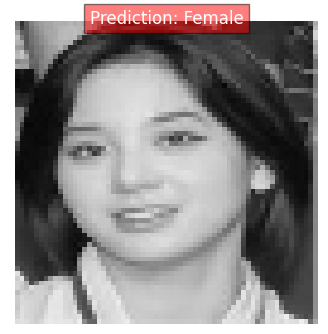

Prediction probability for ROI 2: [0.]
1/1 [==============================] - 0s 119ms/step


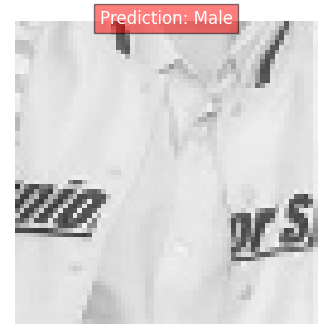

Prediction probability for ROI 3: [1.]
1/1 [==============================] - 0s 131ms/step


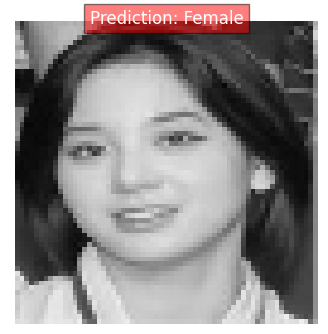

Prediction probability for ROI 4: [0.]
1/1 [==============================] - 0s 133ms/step


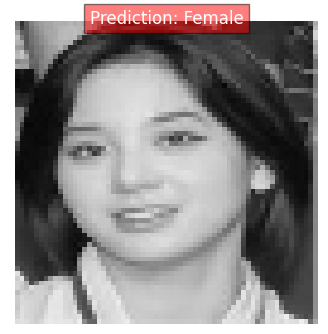

Prediction probability for ROI 5: [0.]
1/1 [==============================] - 0s 121ms/step


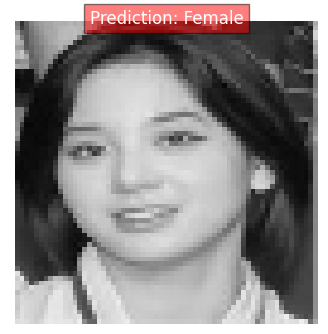

Prediction probability for ROI 6: [0.]


In [81]:
# Preprocess ROIs and make predictions
for i, roi in enumerate(roi_list):
    # Resize ROI to match the input size of your model
    roi = cv2.resize(roi, (target_size[0], target_size[1]))
    # Convert grayscale image to RGB
    rgb_img = cv2.cvtColor(roi, cv2.COLOR_GRAY2RGB)

    # Convert ROI to array and expand dimensions to create batch dimension
    X_roi = image.img_to_array(rgb_img)
    X_roi = np.expand_dims(X_roi, axis=0)

    # Make prediction using your model
    prediction = transfer_model.predict(X_roi)

    # Display ROI image
    plt.figure(figsize=(6, 4))  # Adjust the figsize to your desired size
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Get image dimensions
    img_height, img_width = roi.shape

    # Calculate center coordinates
    center_x = img_width // 2
    center_y = img_height // 2

    # Display prediction result at the center of the image with larger font size
    plt.text(center_x, 0, f'Prediction: {"Female" if prediction < 0.5 else "Male"}',
             fontsize=12, color='white', ha='center', va='center', bbox=dict(facecolor='Red', alpha=0.5))
    plt.show()

    # Print prediction probability
    print(f"Prediction probability for ROI {i+1}: {prediction[0]}")